# Deliverable 1
## TODO: idk where to use or where to put this sections of code

## Part 1

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from numpy import linalg as la

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/just_riccio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    """
    Preprocess a text by tokenizing, lowercasing, removing stop words, and stemming.
    TODO: add bonus points preprocessing (spelling correction, normalizing numbers, 
    synonym replacement / word normalization, etc.)
    """
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stem the tokens
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return tokens

def preprocess_non_textual(document):
    # TODO: preprocess non-textual parts of the document (e.g., numerical data normalization)
    # based on the remaining part of this notebook (section 3 and 4)
    return document

def preprocess_document(document):
    """
    For each textual part of the document, preprocess it
    """

    document.processed_description = preprocess_text(document.description)
    document.processed_title = preprocess_text(document.title)

    document = preprocess_non_textual(document)

    return document


## Section 3
Pros of keeping separate: end user can easily filter products (i.e. if category / sub-category / brand fully matches user filter, product is relevant, otherwise it's not)

Cons of keeping separate: more computation to check general relevance of products

Pros of merging: every aspect of the product helps with relevance (e.g. user can query (not filter) for brands, and the most relevant products will be the one with the user requested brands, but other products, which might still be useful for the user, could still be relevant)

Cons of merging: you lose the option to filter


Maybe some fields could be saved in the inverted index tree using one-hot encoding, to try a hybrid approach, depending on how one wants to build its retrieval engine

## Section 4
out_of_stock: boolean -> if it is out of stock, do not consider this product
selling_price: numerical -> used to filer
discount: numerical -> used to calculate new selling price then filter (could be split into two fields: is_discounted (boolean), discount_value (numerical))
actual_price: numerical -> idk what this is
average_rating: numerical -> filter

## Part 2

In [15]:
# Exploratory Data Analysis

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\leven\\Documents\\GitHub\\Info_Retrieval\\template\\data\\fashion_products_dataset.json"
# Open and load JSON file
with open(file_path, "r") as f:
    data = json.load(f)
    df = pd.DataFrame(data)

print(df.head())


                                    _id actual_price average_rating brand  \
0  fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a        2,999            3.9  York   
1  893e6980-f2a0-531f-b056-34dd63fe912c        1,499            3.9  York   
2  eb4c8eab-8206-59d0-bcd1-a724d96bf74f        2,999            3.9  York   
3  3f3f97bb-5faf-57df-a9ff-1af24e2b1045        2,999            3.9  York   
4  750caa3d-6264-53ca-8ce1-94118a1d8951        2,999            3.9  York   

                   category     crawled_at  \
0  Clothing and Accessories  1612987911000   
1  Clothing and Accessories  1612987912000   
2  Clothing and Accessories  1612987912000   
3  Clothing and Accessories  1612987913000   
4  Clothing and Accessories  1612987913000   

                                         description discount  \
0  Yorker trackpants made from 100% rich combed c...  69% off   
1  Yorker trackpants made from 100% rich combed c...  66% off   
2  Yorker trackpants made from 100% rich combed c...  68% off   


c:\Users\leven\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


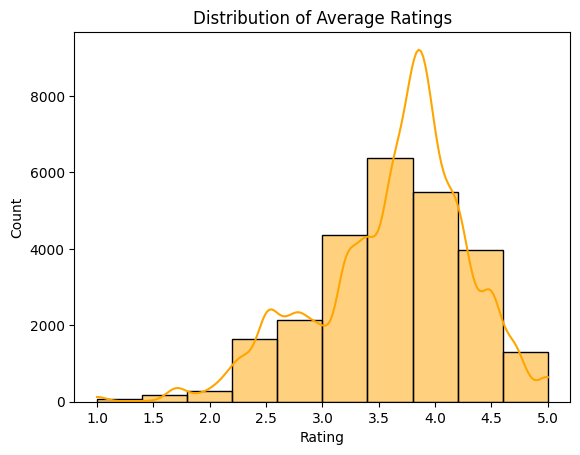

c:\Users\leven\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


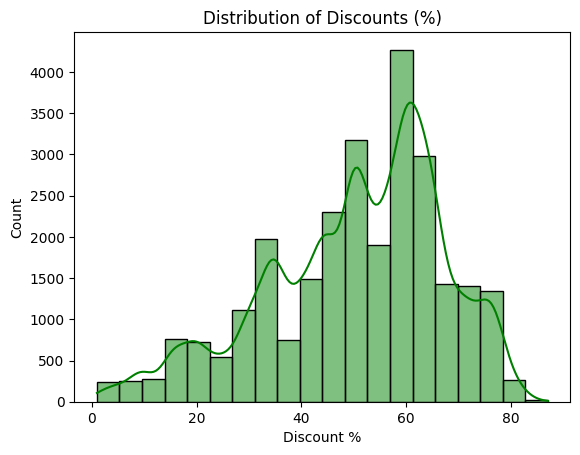

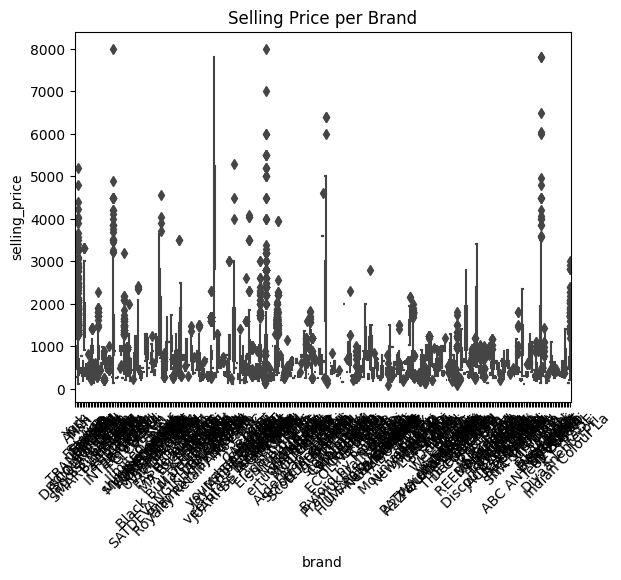

In [ ]:
df["actual_price"] = pd.to_numeric(df["actual_price"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")
sns.histplot(df["actual_price"], bins=50, kde=True)


# Clean all numeric-like columns in one go
df["average_rating"] = pd.to_numeric(df["average_rating"], errors="coerce")
df["discount"] = pd.to_numeric(df["discount"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"].astype(str).str.replace(r"[^\d.]", "", regex=True), errors="coerce")

# Ratings
sns.histplot(df["average_rating"], bins=10, kde=True, color="orange")
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.show()

# Discounts
sns.histplot(df["discount"], bins=20, kde=True, color="green")
plt.title("Distribution of Discounts (%)")
plt.xlabel("Discount %")
plt.show()

# Selling price per brand
sns.boxplot(x="brand", y="selling_price", data=df)
plt.title("Selling Price per Brand")
plt.xticks(rotation=45)
plt.show()
